In [ ]:
import os
os.listdir()


['.config', 'clintox.csv.gz', 'sample_data']

In [ ]:
import os

try:
    os.remove('clintox.csv (1).gz')
    print("File 'clintox.csv (1).gz' removed successfully.")
except FileNotFoundError:
    print("File 'clintox.csv (1).gz' not found. It might have been deleted already.")
except Exception as e:
    print(f"An error occurred: {e}")


File 'clintox.csv (1).gz' not found. It might have been deleted already.


In [ ]:
import os
os.listdir()


['.config', 'clintox.csv.gz', 'sample_data']

--- Starting PHASE A: Dataset Loading and Initial Diagnostics ---
Loading dataset from clintox.csv.gz...

[Diagnostic] Dataset Shape: (1484, 3)
[Diagnostic] Columns: ['smiles', 'FDA_APPROVED', 'CT_TOX']

[Analysis] Missing Values per Column:
 -> No missing values found in the dataset.

[Setup] Identifying SMILES column...
 -> Found SMILES column: 'smiles'

[Setup] processing Toxicity Label...
 -> Created 'toxicity_label' from 'CT_TOX'

[Analysis] Toxicity Label Distribution ('toxicity_label'):
Counts:
toxicity_label
0    1372
1     112
Name: count, dtype: int64
Percentages:
toxicity_label
0    92.45283
1     7.54717
Name: proportion, dtype: float64


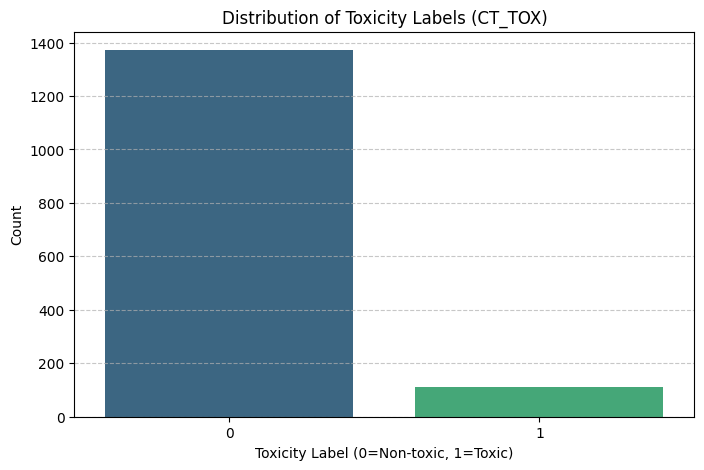


--- Running Final Sanity Checks ---
Success: df_raw is available globally.
Success: SMILES_COL is set to 'smiles'.
--- PHASE A COMPLETED SUCCESSFULLY ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def run_phase_a():
    """
    Executes Phase A: Dataset Loading and Initial Diagnostics.
    Returns the loaded dataframe and the SMILES column name to be assigned to globals.
    """
    filename = 'clintox.csv.gz'
    smiles_col_name = 'smiles'
    target_col_original = 'CT_TOX'

    print(f"--- Starting PHASE A: Dataset Loading and Initial Diagnostics ---")

    # 1. Load the dataset
    if not os.path.exists(filename):
        raise FileNotFoundError(f"CRITICAL ERROR: File '{filename}' not found in current directory.")

    print(f"Loading dataset from {filename}...")
    # Compression is usually inferred, but specified explicitly as requested
    df = pd.read_csv(filename, compression='gzip')

    # 3. Basic Diagnostics
    print(f"\n[Diagnostic] Dataset Shape: {df.shape}")
    print(f"[Diagnostic] Columns: {list(df.columns)}")

    # 4. Missing-value analysis
    print(f"\n[Analysis] Missing Values per Column:")
    missing_counts = df.isnull().sum()
    if missing_counts.sum() == 0:
        print(" -> No missing values found in the dataset.")
    else:
        print(missing_counts[missing_counts > 0])

    # 5. Identify SMILES column
    print(f"\n[Setup] Identifying SMILES column...")
    assert smiles_col_name in df.columns, f"CRITICAL ERROR: Column '{smiles_col_name}' missing from dataset."
    print(f" -> Found SMILES column: '{smiles_col_name}'")

    # 6. Identify and standardize toxicity label
    print(f"\n[Setup] processing Toxicity Label...")
    assert target_col_original in df.columns, f"CRITICAL ERROR: Column '{target_col_original}' missing."

    # Create NEW standardized column (Deep copy to avoid SettingWithCopy warnings if implied)
    df['toxicity_label'] = df[target_col_original]
    print(f" -> Created 'toxicity_label' from '{target_col_original}'")

    # 7. Analyze toxicity label distribution
    print(f"\n[Analysis] Toxicity Label Distribution ('toxicity_label'):")
    counts = df['toxicity_label'].value_counts()
    percentages = df['toxicity_label'].value_counts(normalize=True) * 100

    print(f"Counts:\n{counts}")
    print(f"Percentages:\n{percentages}")

    # 8. Plot distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x='toxicity_label', data=df, hue='toxicity_label', palette='viridis', legend=False)
    plt.title('Distribution of Toxicity Labels (CT_TOX)')
    plt.xlabel('Toxicity Label (0=Non-toxic, 1=Toxic)')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return df, smiles_col_name

# --- EXECUTION ---

# Execute logic and assign to GLOBAL variables
df_raw, SMILES_COL = run_phase_a()

# 10. HARD Sanity Checks
print(f"\n--- Running Final Sanity Checks ---")
assert df_raw is not None, "Global variable df_raw is None"
assert not df_raw.empty, "df_raw is empty"
assert SMILES_COL == 'smiles', "SMILES_COL is not set correctly"
assert SMILES_COL in df_raw.columns, "SMILES_COL column missing in df_raw"
assert 'toxicity_label' in df_raw.columns, "'toxicity_label' column missing in df_raw"
assert 'CT_TOX' in df_raw.columns, "Original 'CT_TOX' column was accidentally removed"

print(f"Success: df_raw is available globally.")
print(f"Success: SMILES_COL is set to '{SMILES_COL}'.")
print(f"--- PHASE A COMPLETED SUCCESSFULLY ---")